<a href="https://colab.research.google.com/github/ayushanand18/pyobis/blob/dataset-viz/notebooks/contributions_quantification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantifying and visualizing contributions from person and organization

This notebook entails the quantitative analysis of contributions made by individuals and organisations to the OBIS data base. We will analyse datasets covering a set geometry and time period - our spatiotemporal area of interest.

We will use `pyobis` to fetch data.

## Installing `pyobis`

In [1]:
try:
  import pyobis
except:
  !pip install -q "git+https://github.com/iobis/pyobis.git"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


#### importing other modules

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)}, style="darkgrid")

In [4]:
from pyobis import occurrences as occ
from pyobis import dataset

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [58]:
import plotly.express as px

## Grabbing data

For our analysis we will need to restrict ourselves to only a specific datasets that have data falling in our spatio-temporal region of interest. We will fetch all the datasets recorded between 2009-2018 and see the distribution among providers.

In [14]:
res = dataset.search(startdate="2008-01-01", enddate="2019-12-12", geometry="POLYGON ((-68.0273 44.4391, -81.7383 30.5770,-80.5664 25.1969, -74.3555 20.7777, -66.7383 19.4580, -64.7461 29.2573, -54.7851 37.1822, -46.1133 42.0508, -45.9961 46.9740, -53.6133 47.0539, -68.0273 44.4391)))")["results"]

Now we will convert this data into a pandas DataFrame.

In [15]:
data = pd.DataFrame(res)
data

,id,url,archive,published,created,updated,core,extensions,statistics,extent,...,citation_id,abstract,intellectualrights,feed,institutes,contacts,nodes,keywords,downloads,records
0,7b6fa45f-e4fd-4e40-a537-97eb2f63c690,http://ipt.iobis.org/obiscanada/resource?r=mar...,http://ipt.iobis.org/obiscanada/archive.do?r=m...,2022-03-23T21:27:07.000Z,2021-03-10T18:41:42.546Z,2022-06-23T05:42:37.822Z,event,"[measurementorfact, occurrence]","{'Event': 9525, 'absence': 4415, 'dropped': 0,...","POLYGON((-67.7115 41.2635,-67.7115 47.85,-57.1...",...,None,"“Summer” missions occur in June, July and Augu...",This work is licensed under a Creative Common...,"{'id': '6ae5ad4f-2a01-43bd-9fb4-cc9c7f38f105',...","[{'name': 'Fisheries and Oceans Canada', 'ocea...","[{'role': None, 'type': 'creator', 'givenname'...",[{'id': '7dfb2d90-9317-434d-8d4e-64adf324579a'...,"[{'keyword': 'Samplingevent', 'thesaurus': 'GB...","[{'year': 2022, 'downloads': 7542, 'records': ...",548120
1,d895e645-a98d-4720-b6fb-332929190f36,http://ipt.iobis.org/obiscanada/resource?r=mar...,http://ipt.iobis.org/obiscanada/archive.do?r=m...,2022-03-23T20:56:26.000Z,2021-03-10T18:53:16.141Z,2022-06-26T04:35:29.823Z,event,"[measurementorfact, occurrence]","{'Event': 4203, 'absence': 1646, 'dropped': 34...","POLYGON((-69.991167 39.972167,-69.991167 46.48...",...,None,The Fisheries and Oceans Canada (DFO) ecosyste...,This work is licensed under a Creative Common...,"{'id': '6ae5ad4f-2a01-43bd-9fb4-cc9c7f38f105',...","[{'name': 'Fisheries and Oceans Canada', 'ocea...","[{'role': None, 'type': 'creator', 'givenname'...",[{'id': '7dfb2d90-9317-434d-8d4e-64adf324579a'...,"[{'keyword': 'Samplingevent', 'thesaurus': 'GB...","[{'year': 2022, 'downloads': 5340, 'records': ...",283420
2,68670603-4fca-4b3b-ab33-f50b859e3afc,http://ipt.iobis.org/obiscanada/resource?r=obi...,http://ipt.iobis.org/obiscanada/archive.do?r=o...,2021-04-16T11:07:13.000Z,None,2021-10-16T21:59:16.448Z,occurrence,[],"{'Event': 0, 'absence': 0, 'dropped': 0, 'Occu...","POLYGON((-67.12 42.78,-67.12 47.09,-59.67 47.0...",...,http://iobis.org/mapper/?resource_id=3001,American lobster (Homarus americanus)is a high...,rights: http://creativecommons.org/publicdomai...,"{'id': '6ae5ad4f-2a01-43bd-9fb4-cc9c7f38f105',...",[{'name': 'Fisheries and Oceans Canada – Bedfo...,"[{'role': None, 'type': 'creator', 'givenname'...",[{'id': '7dfb2d90-9317-434d-8d4e-64adf324579a'...,"[{'keyword': 'biota', 'thesaurus': 'GCMD keywo...","[{'year': 2022, 'downloads': 1095, 'records': ...",192049
3,5055f146-1a0a-41be-a747-24968c2cf584,http://ipt.env.duke.edu/resource?r=zd_2065,https://ipt.env.duke.edu/archive.do?r=zd_2065,2022-06-07T16:21:18.000Z,2020-06-09T00:08:37.635Z,2022-07-21T07:04:43.892Z,occurrence,[],"{'Event': 0, 'absence': 0, 'dropped': 3, 'Occu...","POLYGON((-80.7652 31.7987,-80.7652 36.546,-74....",...,https://remote.normandeau.com,"Original provider:\nAPEM, Normandeau Associate...",This work is licensed under a Creative Common...,"{'id': '18954703-9b9d-4584-b46d-87846532c5ee',...",None,"[{'role': None, 'type': 'creator', 'givenname'...",[{'id': '573654c1-4ce7-4ea2-b2f1-e4d42f8f9c31'...,"[{'keyword': 'Occurrence,Marine Animal Survey,...","[{'year': 2022, 'downloads': 2088, 'records': ...",124941
4,f5a4799e-dc24-4807-89d9-01da47d52e3b,https://www1.usgs.gov/obis-usa/ipt/resource?r=...,https://www1.usgs.gov/obis-usa/ipt/archive.do?...,2022-05-06T21:30:00.000Z,None,2022-05-07T00:08:54.204Z,occurrence,[],"{'Event': 0, 'absence': 1, 'dropped': 18, 'Occ...","POLYGON((-179.995 -78.9167,-179.995 74.35,179....",...,None,NOAA’s Deep-Sea Coral Research and Technology ...,"To the extent possible under law, the publishe...","{'id': '8112d75b-7e78-4641-9e09-9a2cc7db7375',...",[{'name': 'National Oceanic and Atmospheric Ad...,"[{'role': None, 'type': 'creator', 'givenname'...",[{'id': 'b7c47783-a020-4173-b390-7b57c4fa1426'...,"[{'keyword': 'Occurrence', 'thesaurus': 'GBIF ...","[{'year': 2022, 'downloads': 15645, 'records':...",94242
...,...,...,...,..

Now let us see the data provider's details.

In [16]:
data["contacts"]

0      [{'role': None, 'type': 'creator', 'givenname'...
1      [{'role': None, 'type': 'creator', 'givenname'...
2      [{'role': None, 'type': 'creator', 'givenname'...
3      [{'role': None, 'type': 'creator', 'givenname'...
4      [{'role': None, 'type': 'creator', 'givenname'...
                             ...                        
280    [{'role': None, 'type': 'creator', 'givenname'...
281    [{'role': None, 'type': 'creator', 'givenname'...
282    [{'role': None, 'type': 'creator', 'givenname'...
283    [{'role': None, 'type': 'creator', 'givenname'...
284    [{'role': None, 'type': 'creator', 'givenname'...
Name: contacts, Length: 285, dtype: object

We can see that the data provider details are nested into lists of dictionaries. We will need to unnest this data and gather information about dataset owner.

In [17]:
unnest_df = pd.json_normalize(res, "contacts", ["id"]) # we will identify the records using dataset UUID
unnest_df

,role,type,givenname,surname,organization,position,email,url,organization_oceanexpert_id,type_display,id
0,None,creator,Catriona,Regnier-McKellar,Fisheries and Oceans Canada,Survey Biologist,catriona.regnier-mckellar@dfo-mpo.gc.ca,None,19196.0,Creator,7b6fa45f-e4fd-4e40-a537-97eb2f63c690
1,None,contact,Catriona,Regnier-McKellar,Fisheries and Oceans Canada,Survey Biologist,catriona.regnier-mckellar@dfo-mpo.gc.ca,None,19196.0,Contact,7b6fa45f-e4fd-4e40-a537-97eb2f63c690
2,None,metadataProvider,Catriona,Regnier-McKellar,Fisheries and Oceans Canada,Survey Biologist,catriona.regnier-mckellar@dfo-mpo.gc.ca,None,19196.0,Metadata Provider,7b6fa45f-e4fd-4e40-a537-97eb2f63c690
3,None,creator,Catriona,Regnier-McKellar,Fisheries and Oceans Canada,Survey Biologist,Catriona.Regnier-McKellar@dfo-mpo.gc.ca,None,19196.0,Creator,d895e645-a98d-4720-b6fb-332929190f36
4,None,contact,Catriona,Regnier-McKellar,Fisheries and Oceans Canada,Survey Biologist,Catriona.Regnier-McKellar@dfo-mpo.gc.ca,None,19196.0,Contact,d895e645-a98d-4720-b6fb-332929190f36
...,...,...,...,...,...,...,...,...,...,...,...
1920,None,creator,Annamarie,Hatcher,Cape Breton University,Point of contact,annamarie_hatcher@cbu.ca,None,19286.0,Creator,cce047ce-e38f-4007-b5f1-1eb4ec203879
1921,None,contact,Annamarie,Hatcher,Cape Breton University,Point of contact,annamarie_hatcher@cbu.ca,None,19286.0,Contact,cce047ce-e38f-4007-b5f1-1eb4ec203879
1922,None,metadataProvider,Annamarie,Hatcher,Cape Breton University,Point of contact,annamarie_hatcher@cbu.ca,None,19286.0,Metadata Provider,cce047ce-e38f-4007-b5f1-1eb4ec203879
1923,publisher,associatedParty,None,OBIS Canada,Fisheries and Oceans Canada,data management team,mary.kennedy@dfo-mpo.gc.ca,None,5070.0,Publisher,cce047ce-e38f-4007-b5f1-1eb4ec203879


Now that we have unnested the creator data, let us see the specifics.

In [18]:
unnest_df[unnest_df["position"]=="Primary contact"].groupby("id").givenname.count()

id
00e92406-7ace-4fae-aae1-a294c7dec151    3
0209f663-7a17-4422-ad50-db5a07bbe2ee    3
022709a2-922a-4295-ae54-0538d6a04e10    3
035be567-3064-485e-9773-b936f0482cbb    3
0393c368-5ef8-4dc2-8cf9-2d49e9117381    3
                                       ..
fbd419a6-2760-43cf-a946-737edaf137d9    3
fbea11b1-c8f7-4c87-bd35-1a6bcd2ffaff    3
fd293613-5b4c-45bb-991f-f01aae6228e4    3
fef0bdef-04de-4968-a5e2-d267463d00af    3
ffedb747-4afe-4151-98fc-6b2470c51f8a    3
Name: givenname, Length: 186, dtype: int64

Now we will fetch dataset owner's name and add it to subsequent records in our original dataframe.

In [19]:
data["owner_name"] = np.NaN
for id in unnest_df.id.unique():
  x = unnest_df[(unnest_df["id"]==id) & (unnest_df["position"]=="Primary contact") & (unnest_df["type_display"]=="Owner")]
  if(x["givenname"].any() and x["surname"].any()): # we will also need to check if it's null
    index = data[data["id"]==id].index
    data.at[index, "owner_name"] = x["givenname"].values[0] + " " + x["surname"].values[0]

Now let us look back at the dataframe.

In [20]:
data["owner_name"]

0                    NaN
1                    NaN
2                    NaN
3      Michelle Vukovich
4                    NaN
             ...        
280                  NaN
281        Ted Cheeseman
282        Richie Tucker
283        Ted Cheeseman
284                  NaN
Name: owner_name, Length: 285, dtype: object

### Grab occurrences data
We will grab top 5 records for top 3 names and fetch their data. For this we will first find out which dataset owners have contributed the most and how much. Here's a chart of owners with their respective record numbers.

In [38]:
data.sort_values("records").groupby("owner_name")["records"].sum().sort_values(ascending=False)

owner_name
Michelle Vukovich       253939
Tim Cole                 21412
Beth Josephson           10948
William McLellan         10076
Andrea Krzystan           6226
Laura Dias                4077
Timothy Gowan             3405
Nathan Robinson           1634
Sue Barco                 1500
Kristen Ampela            1409
Ted Cheeseman             1072
Zach Swaim                 828
Oliver Boisseau            808
Amy Engelhaupt             772
Charlotte Dunn             485
Dana Spontak               396
Kim Urian                  362
Taylor Jessica             321
Michele Lamping            180
Dave Johnston              179
Gwen Lockhart              178
University Florida         172
Michael Coyne              139
Jooke Robbins              123
Kate Mansfield             116
Tony Tucker                 99
Stellwagen Sanctuary        74
Arthur Kopelman             54
Marie Veit                  51
Linda Welch                 44
Shigetomo Hirama            40
Nuria Cruz                  

So the top 3 names are 'Michelle Vukovich', 'Tim Cole', and 'Beth Josephson' (excluding the nan names).

In [39]:
record_ids = {}
for j in ['Michelle Vukovich', 'Tim Cole', 'Beth Josephson']:
  record_ids[j] = data[data["owner_name"]==j].sort_values("records")["id"].values[0:3].tolist()
record_ids

{'Michelle Vukovich': ['a646ef47-45d2-489e-9593-a5dfd2173b91',
  'f0f23def-2abb-4671-864f-6f3dd1ade46b',
  '0ff4be1c-4f94-4599-b782-b7cb8f5db151'],
 'Tim Cole': ['ea93b52d-23aa-4be7-9686-a56be3b3ee2b'],
 'Beth Josephson': ['45881aeb-30c9-4c19-9723-b0655b0609d5',
  '0a3d1f18-2f69-4fae-bb1d-f2cca98c980a',
  '7ed0d3b4-1926-4bc1-ae6d-f7c662eef41d']}

These are the dataset ids which we need to query occurrence records for.

In [40]:
# we will define a helper function to handle list dataset UUIDs
def handlevector(vector):
  string = str(vector)
  string = string.replace("[",'').replace(']','').replace('\'','').replace(' ','')
  return string

In [41]:
l = []
for i in record_ids.values():
  l.append(i)
# let us fetch the records while keeping in mind our spatio-temporal region of interest
occ_data = occ.search(datasetid=handlevector(l), startdate="2008-01-01", enddate="2019-12-12", geometry="POLYGON ((-68.0273 44.4391, -81.7383 30.5770,-80.5664 25.1969, -74.3555 20.7777, -66.7383 19.4580, -64.7461 29.2573, -54.7851 37.1822, -46.1133 42.0508, -45.9961 46.9740, -53.6133 47.0539, -68.0273 44.4391)))")


Fetched 104621 records.


In [42]:
occ_df = pd.DataFrame(occ_data["results"])
occ_df

,infraphylum,megaclass,date_year,scientificNameID,scientificName,individualCount,associatedReferences,dropped,aphiaID,decimalLatitude,...,suborderid,suborder,infraorder,subfamily,subfamilyid,infraclassid,infraclass,superorder,superorderid,wrims
0,Gnathostomata,Tetrapoda,2019,urn:lsid:marinespecies.org:taxname:137138,Larus argentatus,1,"[{""crossref"":{""citeinfo"":{""origin"":""Normandeau...",False,137138,39.005400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,Tetrapoda,2018,urn:lsid:marinespecies.org:taxname:136987,Alcidae,1,"[{""crossref"":{""citeinfo"":{""origin"":""Normandeau...",False,136987,39.756900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,NaN,2012,urn:lsid:marinespecies.org:taxname:127405,Mola mola,1,"[{""crossref"":{""citeinfo"":{""origin"":""Gatzke J, ...",False,127405,42.344680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,Tetrapoda,2019,urn:lsid:marinespecies.org:taxname:137105,Stenella attenuata,NaN,"[{""crossref"":{""citeinfo"":{""origin"":""APEM and N...",False,137105,31.853100,...,370545.0,Cetancodonta,Cetacea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gnathostomata,Tetrapoda,2019,urn:lsid:marinespecies.org:taxname:137047,Sterna,1,"[{""crossref"":{""citeinfo"":{""origin"":""Normandeau...",False,137047,39.621100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104616,Gnathostomata,Tetrapoda,2016,urn:lsid:marinespecies.org:taxname:2688,Cetacea,1,"[{""crossref"":{""citeinfo"":{""origin"":""Gatzke J, ...",False,2688,42.225674,...,370545.0,Cetancodonta,Cetacea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104617,Gnathostomata,Tetrapoda,2019,urn:lsid:marinespecies.org:taxname:137094,Delphinus delphis,1,"[{""crossref"":{""citeinfo"":{""origin"":""Normandeau...",False,137094,39.600700,...,370545.0,Cetancodonta,Cetacea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104618,Gnathostomata,NaN,2019,urn:lsid:marinespecies.org:taxname:158544,Rhinoptera bonasus,NaN,"[{""crossref"":{""citeinfo"":{""origin"":""APEM and N...",False,158544,32.480900,...,NaN,NaN,NaN,Rhinopterinae,148877.0,368409.0,Batoidea,NaN,NaN,NaN
104619,Gnathostomata,Tetrapoda,2017,urn:lsid:marinespecies.org:taxname:148776,Morus bassanus,1,"[{""crossref"":{""citeinfo"":{""origin"":""APEM and N...",False,148776,39.946400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have grabbed our data let us fit in the names to this dataframe corresponding to the occurrence id.

In [43]:
occ_df["owner_name"] = np.nan
for key in record_ids:
  for item in record_ids[key]:
    index = occ_df[occ_df["dataset_id"]==item].index
    occ_df.loc[index,"owner_name":"owner_name"] = key

Now that we have fitted in the names, let us view the specifics.

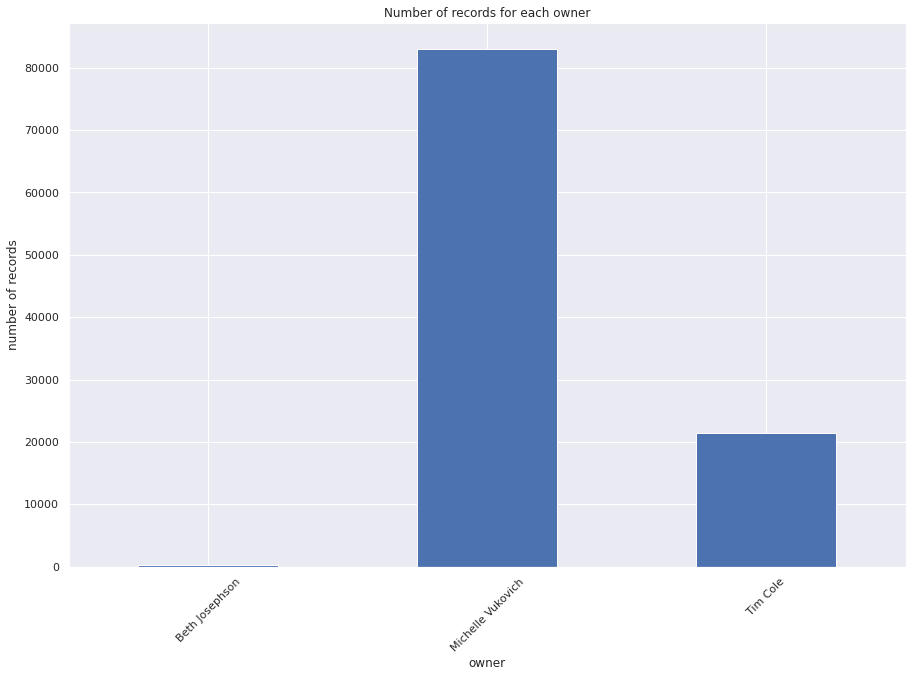

In [44]:
occ_df.groupby("owner_name").scientificName.count().plot.bar()
plt.title("Number of records for each owner")
plt.xlabel("owner")
plt.ylabel("number of records")
plt.xticks(rotation=45)
plt.show();

We can see that most of the records are contributed by `"Michelle V."`, cheers to her! Since we do not have a diverse portfolio we might get some majority bias.

We are now ready to begin with our visualization, let's get started.

----
### Taxonomic Distribution

Let us now study the taxonomic coverage of the records from these datasets.

In [84]:
@interact
def show_contribution_per_owner(owner =list(occ_df["owner_name"].unique())):
  df_temp = pd.DataFrame(columns=["scientificName","records"])
  df_temp.scientificName = occ_df[occ_df["owner_name"]==owner].groupby("scientificName")["scientificName"].agg('count').index
  df_temp.records = occ_df[occ_df["owner_name"]==owner].groupby("scientificName")["scientificName"].agg('count').values
  fig = px.pie(df_temp, values='records', names='scientificName', title=f"Distribution of species by {owner}")
  return fig.show()

interactive(children=(Dropdown(description='owner', options=('Michelle Vukovich', 'Tim Cole', 'Beth Josephson'…

> Note: this interactive plot might not be visible in some static environments like GitHub, please run this in a JupyterLab environment (or Google colab)

We can see that there is a huge taxonomic variety in the records from Michelle V. which is so incredible. Let's see a detailed coverage of species in his records through a horizontal bar chart.

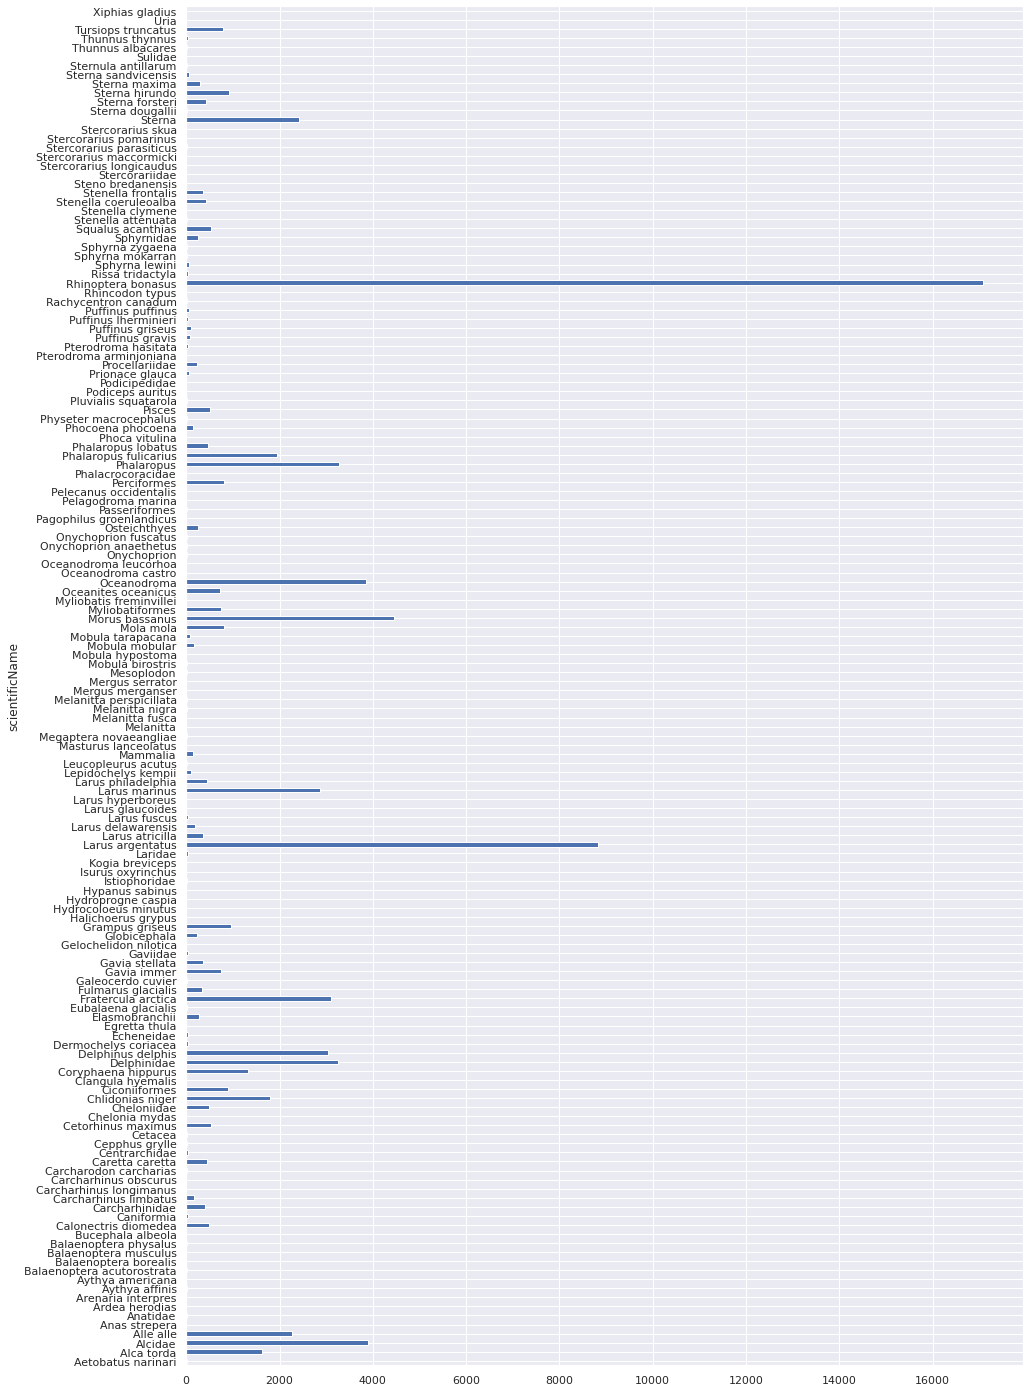

In [91]:
occ_df[occ_df["owner_name"]=='Michelle Vukovich'].groupby("scientificName")["scientificName"].agg('count').plot.barh(figsize=(15,25));

We can see that the most number of records are of `Rinoptera bonasus` or Cownose Ray counting up to nearly 160,000.

---

## Spatial Analysis

Let us plot the occurrence records on a world map and look at particularly where are these records present per the dataset owner.

In [46]:
try:
  import geopandas as gpd
except:
  %pip install geopandas
  import geopandas as gpd

In [47]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [48]:
import seaborn as sns

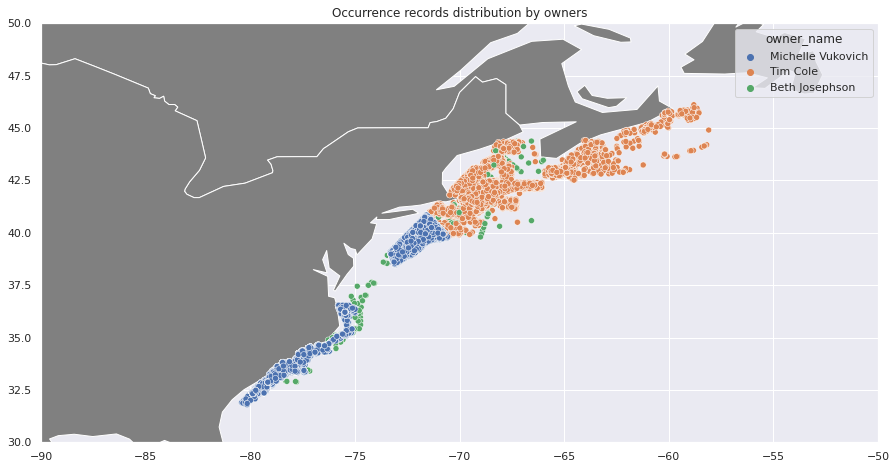

In [51]:
countries.plot(color="grey")
ax = sns.scatterplot(x="decimalLongitude", y="decimalLatitude", hue="owner_name", data=occ_df)
plt.xlabel("")
plt.ylabel("")
plt.title("Occurrence records distribution by owners")
# cropping the plot to our geometry of interest
ax.set_xlim(-90,-50)
ax.set_ylim(30,50)
plt.show()

We can see that datasets provided by Tim Cole and Michele V. cover records relatively on the southern and northern side of west North-American coast. While records by Berth J. cover both regions almost equally.

----
### Temporal Distribution

Let us view how the records span over time for each dataset owner.

In [52]:
from datetime import datetime as dt

In [53]:
import plotly.express as px

In [54]:
# we will get the lowest start date and farthest start date among all the records grouped by the owner name
x1 = (occ_df.groupby("owner_name")["date_start"].agg([np.min,np.max])/1000)[["amin","amax"]].apply([dt.fromtimestamp])

# now we will fetch the names of owners against each row. we are doing this because it will help us create a plotly time plot easily
x1["ownername"] = (occ_df.groupby("owner_name")["date_start"].agg([np.min,np.max])/1000)[["amin","amax"]].apply([dt.fromtimestamp]).index
x1.columns = ["min","max", "ownername"]
# let us now look at the updated dataframe
x1

,min,max,ownername
owner_name,,,
Beth Josephson,2013-02-19,2015-01-03,Beth Josephson
Michelle Vukovich,2016-07-30,2019-12-12,Michelle Vukovich
Tim Cole,2008-01-06,2019-12-12,Tim Cole


In [55]:
fig = px.timeline(x1, x_start="min", x_end="max", y = "ownername")
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    xaxis_title="year", yaxis_title="owner name", title="records distrubition over year for each owner"
)
fig.show()

We can see from this plot that records contirbuted by Marina Costa span the longest time with nearly 33 years. So, if we wish to do a time-series analysis then her datasets will be a good start.

----
### What MoFs are included?

Let us study the MeasurementOrFact records distribution for these dataset ids.

In [56]:
mof_df = occ.search(datasetid=handlevector(l), mof=True, hasextensions="MeasurementOrFact")

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 0/0
Fetched 0 records.


Unfortunately, no MoFs are inluded for these datasets.

----
### What makes this dataset unique?

+ Firstly, as we witnessed in our temporal analysis that records contributed by Tim Cole span the longest time over all the years we enquired for. So, this dataset can help researchers track down on species change over signficantly long period.
+ Datasets contributed by Michelle V. have the most diverse taxonomic coverage which is so incredible (we also discussed a detailed breakup of the taxnomic coverage).